In [75]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [2]:
#load data 
data=pd.read_csv('train.csv')

In [3]:
#checking for total null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

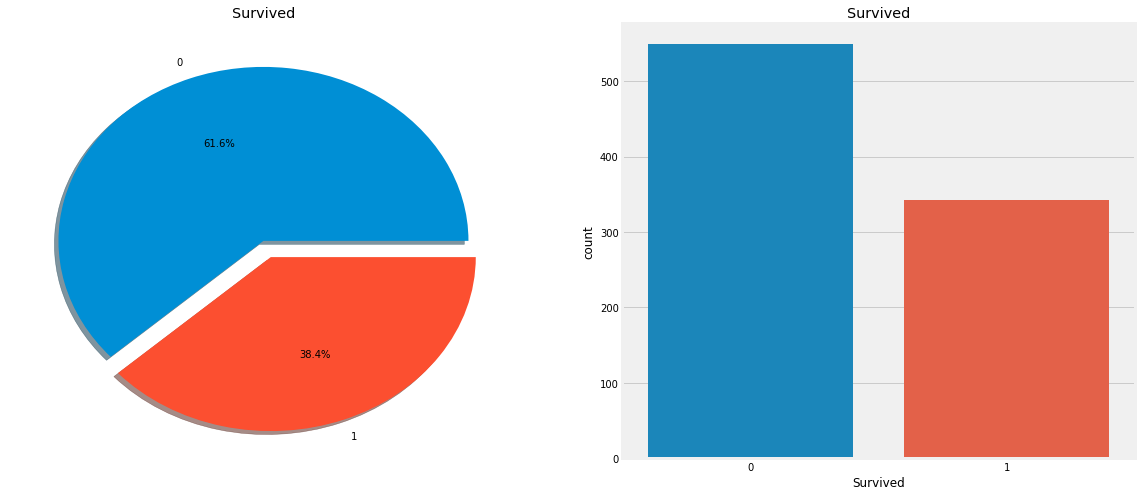

In [4]:
#How many Survived??

f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [5]:
#sex
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

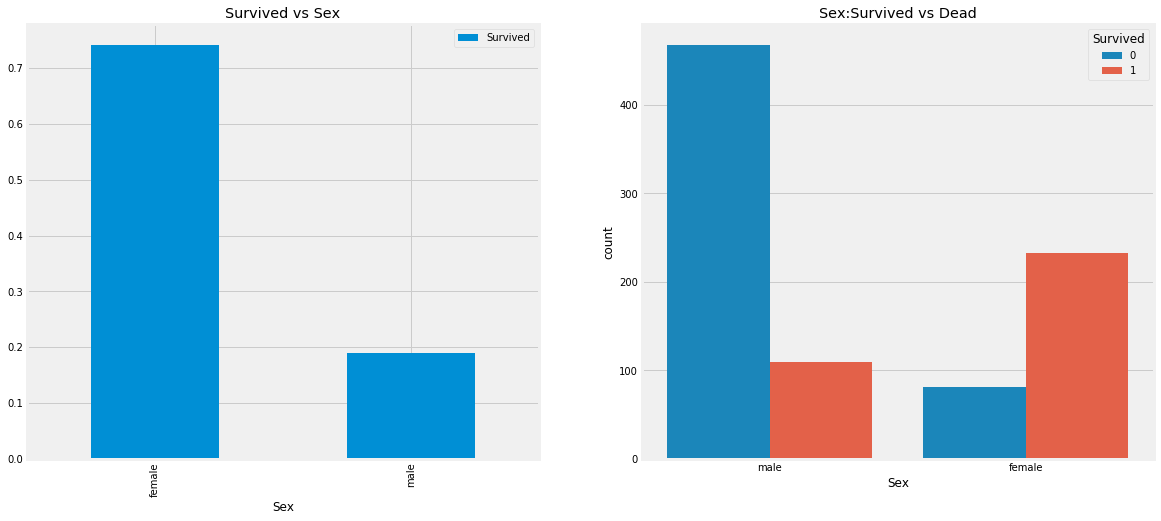

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()



In [7]:
#Pclass
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


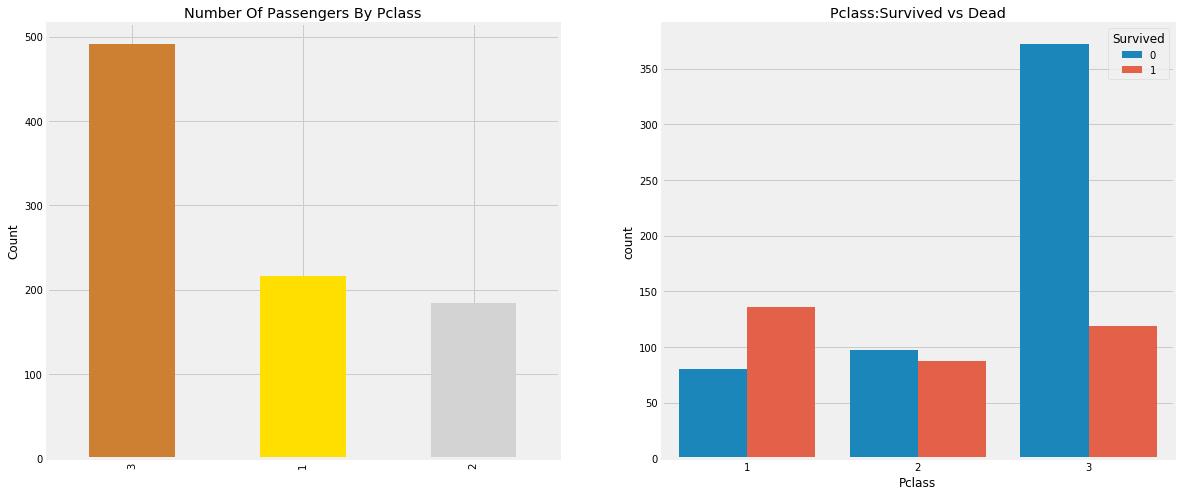

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [9]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

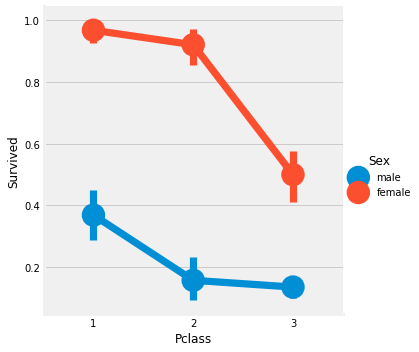

In [10]:
#Sex and Pclass Together
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

In [11]:
#age
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


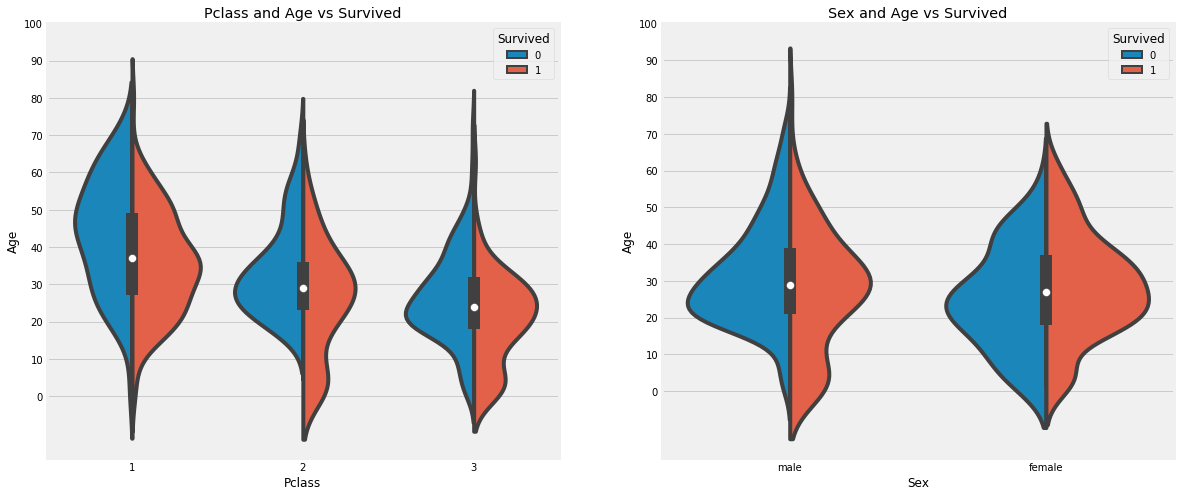

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()


In [13]:
#Name
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [14]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [15]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                         'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [16]:
#lets check the average age by Initials
data.groupby('Initial')['Age'].mean() 

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [17]:
#Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [18]:
#So no null values left finally
data.Age.isnull().any()

False

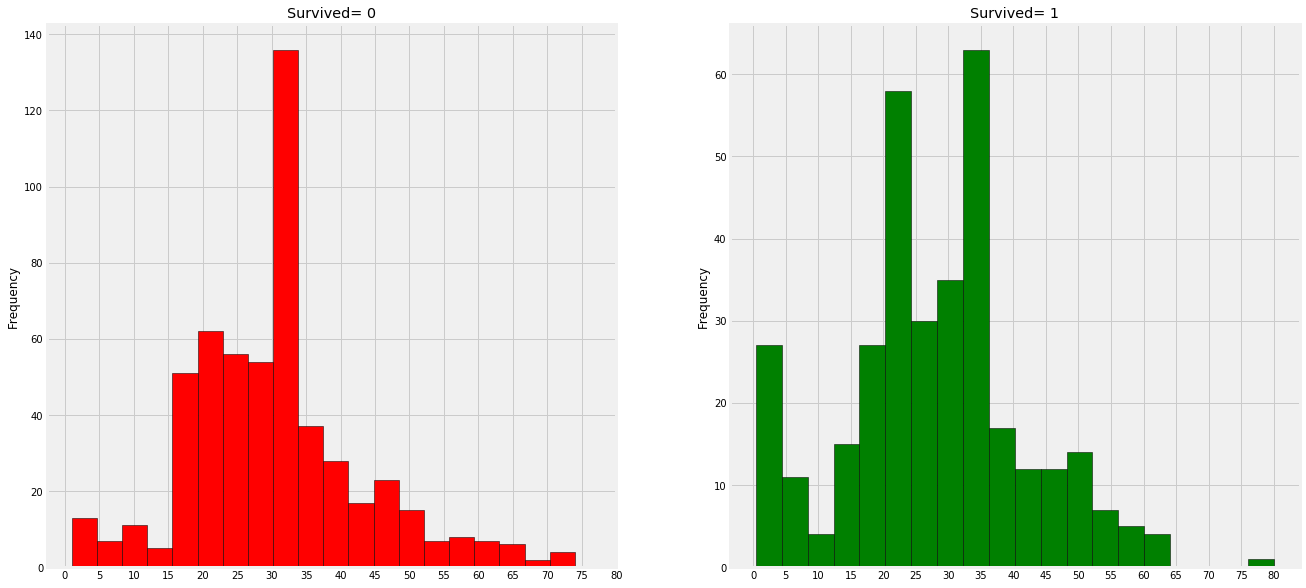

In [19]:
#age with Survived
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

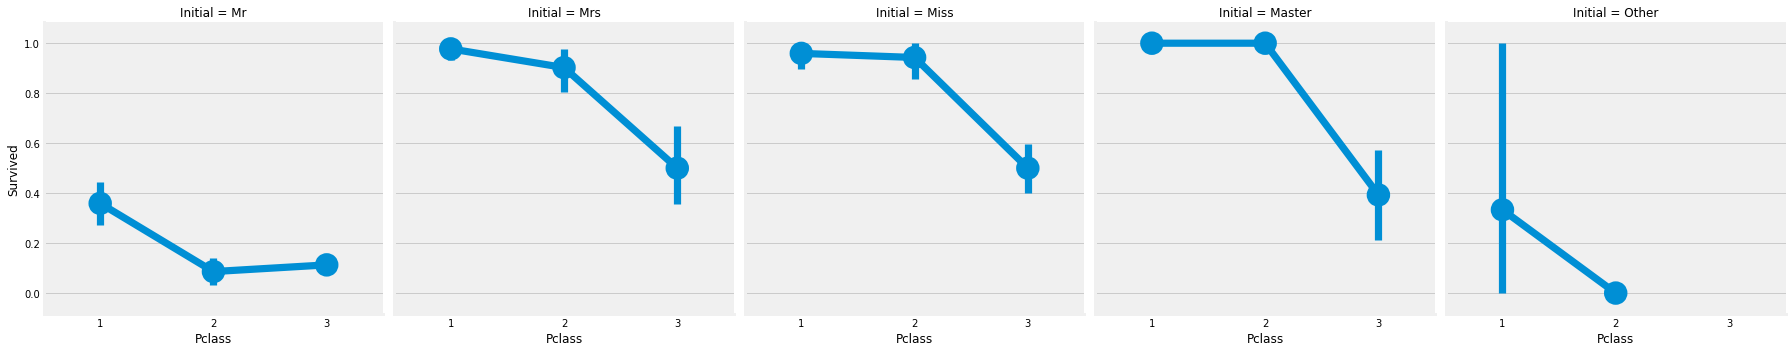

In [20]:
#Survived with pclass
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

In [21]:
#Embarked
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

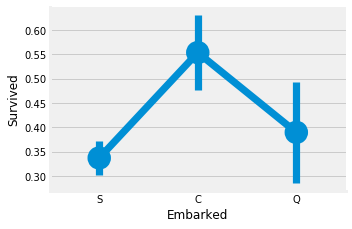

In [22]:
#Chances for Survival by Port Of Embarkation
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

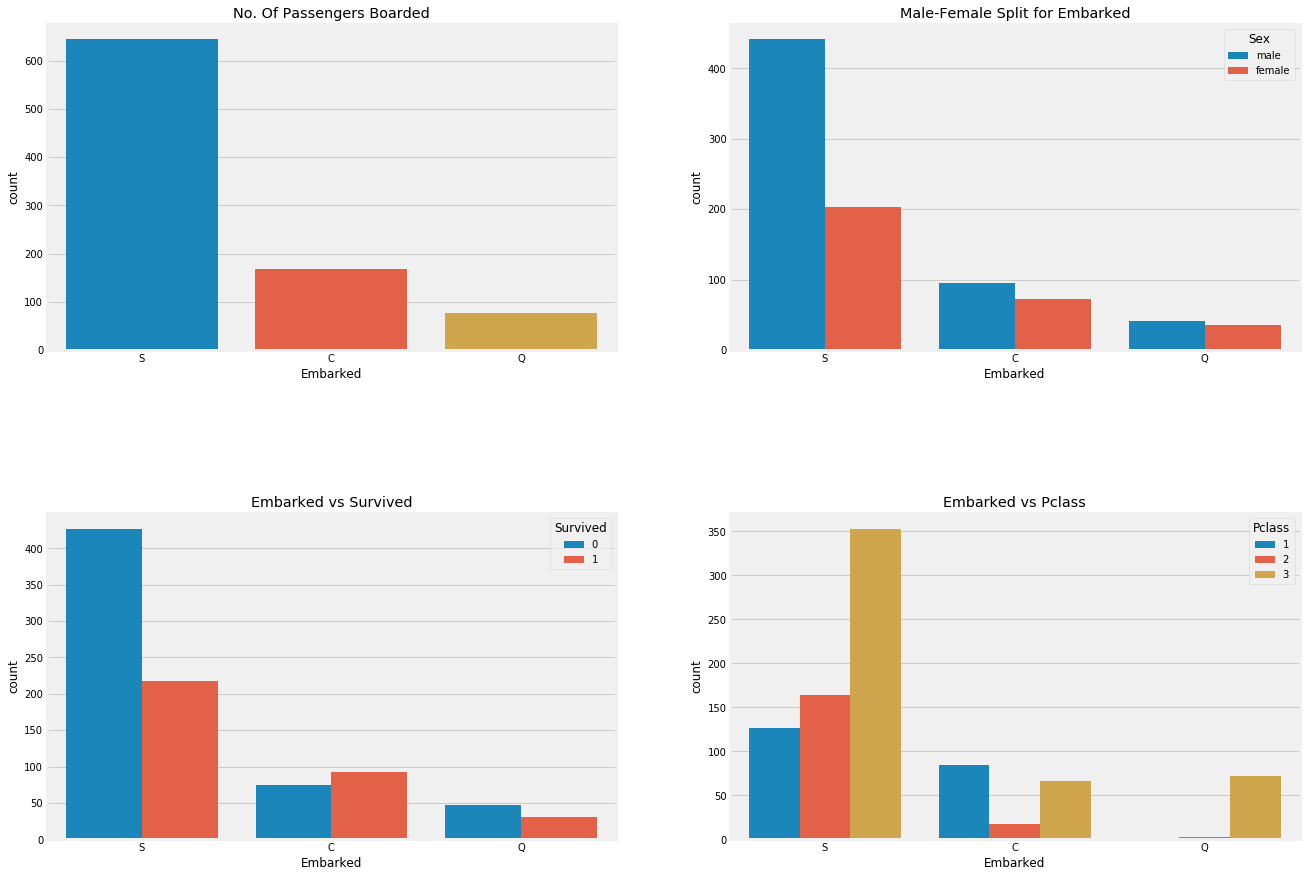

In [23]:
#embarked 
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()



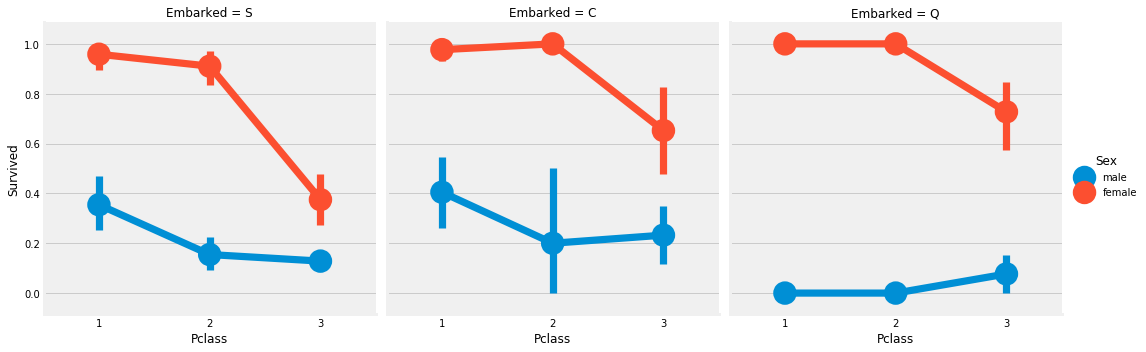

In [24]:
#how for each class male or femal surivied According to embarked
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

In [25]:
#As we saw that maximum passengers boarded from Port S, we replace NaN with S.
data['Embarked'].fillna('S',inplace=True)
data.Embarked.isnull().any()# Finally No NaN values

False

In [26]:
#alone or not
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


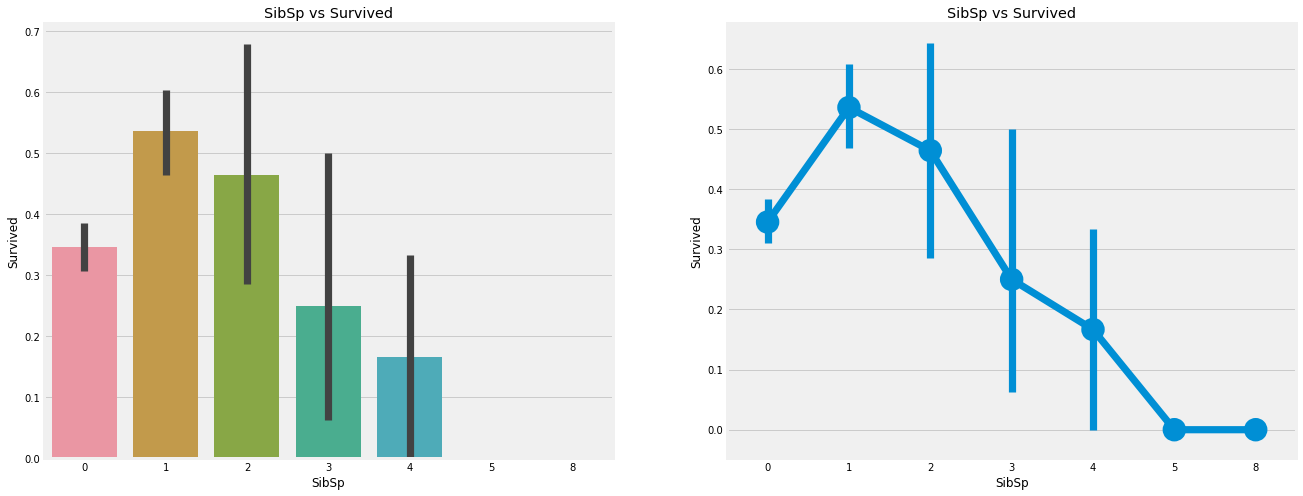

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [28]:
#pclass with class
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [29]:
#parch
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


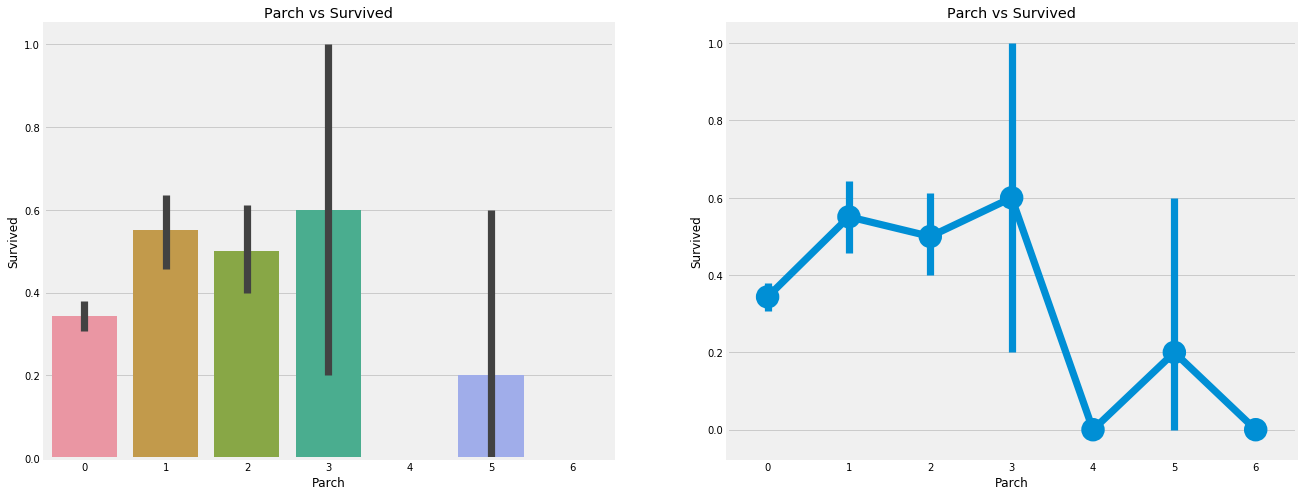

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()



In [31]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


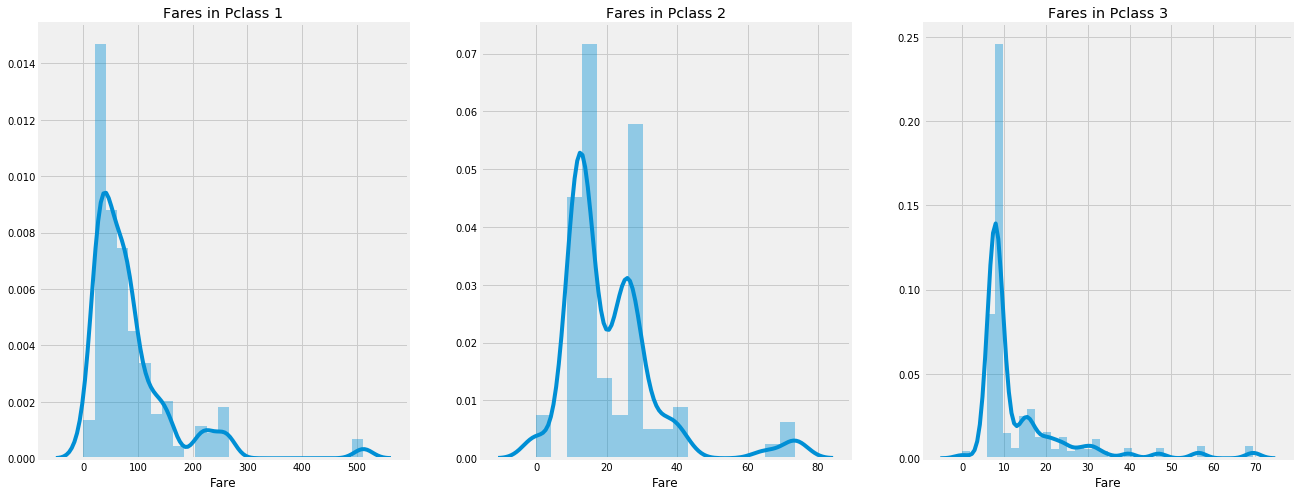

In [32]:
#fare
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

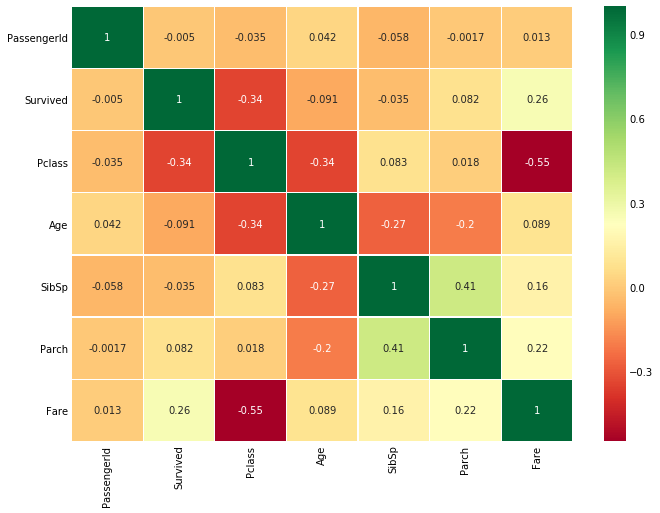

In [33]:
#data.corr()-->correlation matrix
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [34]:
#age band 
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [35]:
#checking the number of passenegers in each band
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


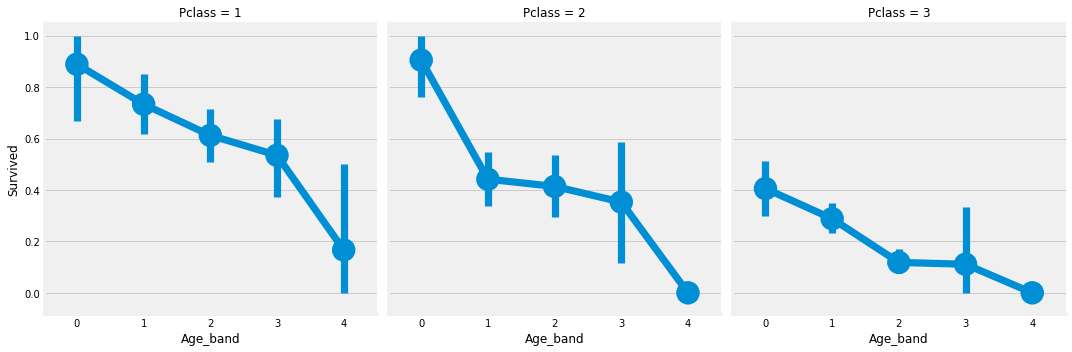

In [36]:
#age band with pclass
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

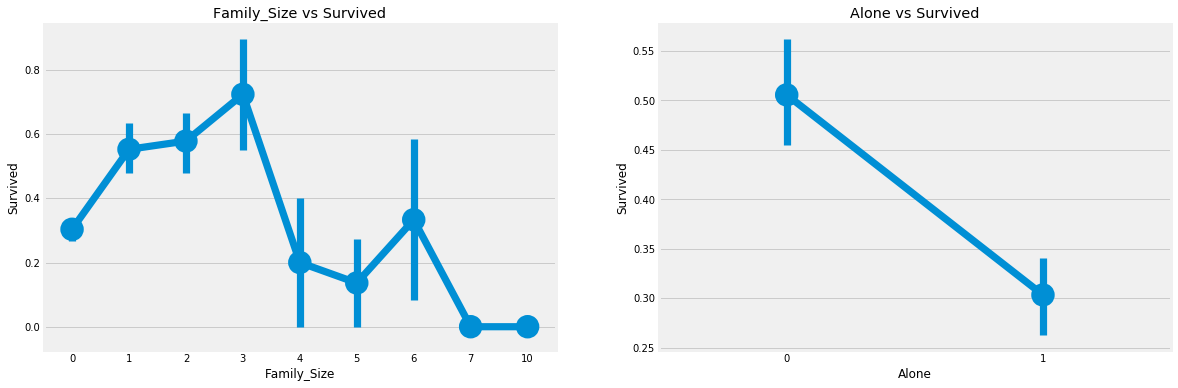

In [37]:
#Family_Size and Alone
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

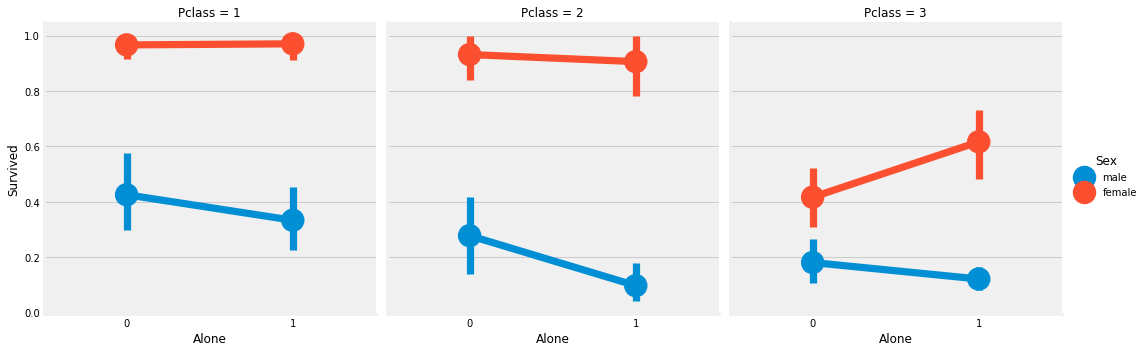

In [38]:
#pclass with alone 
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

In [39]:
#fare range
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [40]:
#convert
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

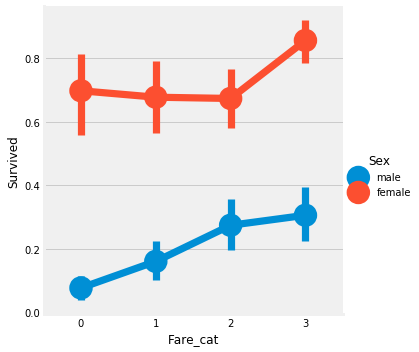

In [41]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

In [42]:
#Converting String Values into Numeric
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

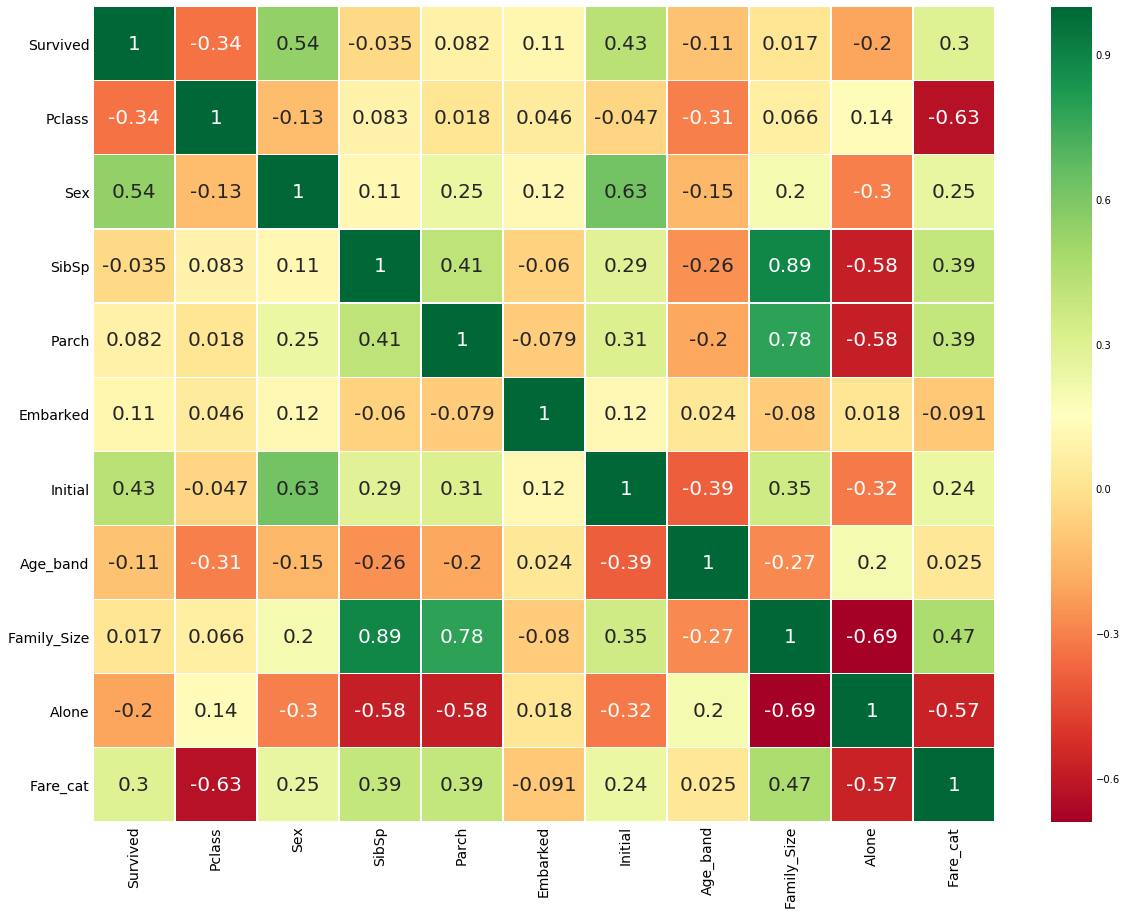

In [43]:
#drop
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [44]:
#SPLIT DATA
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

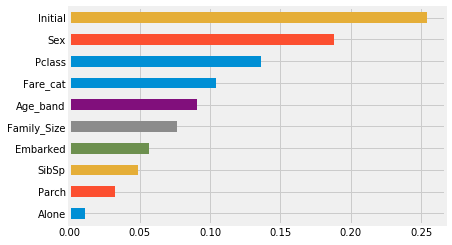

In [45]:
#rank features
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
im=pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True)
im.plot.barh()

In [46]:
#svm.rbf
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))


Accuracy for rbf SVM is  0.835820895522388


In [47]:
#svm.linear
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))


Accuracy for linear SVM is 0.8171641791044776


In [50]:
#svm.poly
model=svm.SVC(kernel='poly', degree=9)
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction3,test_Y))

Accuracy for linear SVM is 0.7985074626865671


In [51]:
#randomForest
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction4,test_Y))


The accuracy of the Random Forests is 0.8097014925373134


In [52]:
n_estimators=range(50,100)
hyper={'n_estimators':n_estimators,'max_features': ['auto'],'max_depth' : [4,5,6,7,8],'criterion' :['gini']}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 250 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:  2.5min finished


0.8338945005611672
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=87, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [53]:
#np
model=GaussianNB()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


In [54]:
#logistic
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the Logistic Regression is 0.8171641791044776


In [55]:
#DecisionTree
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction7,test_Y))


The accuracy of the Decision Tree is 0.7985074626865671


In [56]:
#DecisionTree with entropy
model=DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)
model.fit(train_X,train_Y)
prediction8=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction8,test_Y))

The accuracy of the Decision Tree is 0.8395522388059702


In [57]:
#DecisionTree with gini
model=DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
model.fit(train_X,train_Y)
prediction9=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction9,test_Y))

The accuracy of the Decision Tree is 0.8395522388059702


In [58]:
##cross valdition

In [59]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Poly Svm','Random Forest','Naive Bayes','Logistic Regression','Decision Tree','Decision Tree with entory','Decision Tree with gini']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),svm.SVC(kernel='poly'),RandomForestClassifier(n_estimators=100),GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),DecisionTreeClassifier(criterion = "entropy"),DecisionTreeClassifier(criterion = "gini")]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2


,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Poly Svm,0.824944,0.036835
Random Forest,0.813745,0.034885
Naive Bayes,0.801386,0.028999
Logistic Regression,0.805843,0.021861
Decision Tree,0.805880,0.037337
Decision Tree with entory,0.804782,0.032873
Decision Tree with gini,0.810362,0.030058


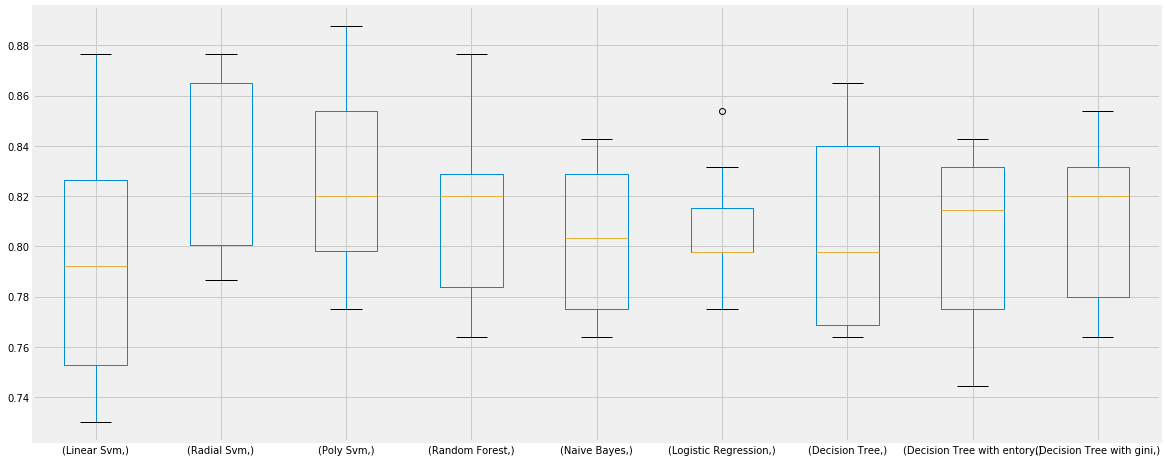

In [60]:
plt.subplots(figsize=(18,8))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

In [61]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())



The cross validated score for AdaBoost is: 0.8249526160481218


In [62]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  9.4min finished


0.8316498316498316
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=200, random_state=None)


In [77]:
#voting 
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                             ], 
                       voting='hard').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8204704346839179


In [72]:
#bagging with decision tree
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8246268656716418
The cross validated score for bagged Decision Tree is: 0.8204826353421859


In [65]:
#bagging with np
model=BaggingClassifier(GaussianNB())
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))

result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8171641791044776
The cross validated score for bagged Decision Tree is: 0.7969489842242651


In [66]:
paramgrid = {
    'n_estimators':      [100, 200, 500, 750, 1000],
    'max_features':      ['auto', 'log2'],
    'min_samples_leaf':  list(range(2, 7)),
    'loss' :             ['deviance', 'exponential'],
    'learning_rate':     [0.05, 0.1, 0.2],
}
GS = GridSearchCV(GradientBoostingClassifier(random_state=77),paramgrid,cv=4)
GS.fit(train_X,train_Y)
prediction=GS.predict(test_X)
print('The accuracy for Gradient Boosting Classifier is:',metrics.accuracy_score(prediction,test_Y))


The accuracy for Gradient Boosting Classifier is: 0.835820895522388


In [78]:
#accuracy,recall,precision,f1_score
fs=[]
accuracy=[]
ac=[]
recall=[]
pre=[]
classifiers=['Linear Svm','Radial Svm','Poly Svm','Random Forest','Naive Bayes','Logistic Regression','Decision Tree','Decision Tree with entory','Decision Tree with gini','BaggingClassifier with NP','BaggingClassifier with Decision Tree','AdaBoost Classifier','Gradient Boosting Classifier','Voting Classifier']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),svm.SVC(kernel='poly'),RandomForestClassifier(n_estimators=100),GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),DecisionTreeClassifier(criterion = "entropy"),DecisionTreeClassifier(criterion = "gini"),BaggingClassifier(GaussianNB()),BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100),AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1),GradientBoostingClassifier(random_state=77),VotingClassifier(estimators=[('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                             ], voting='hard').fit(train_X,train_Y)]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    p=model.predict(test_X)
    fs.append(f1_score(p,test_Y))
    ac.append(metrics.accuracy_score(p,test_Y))
    recall.append(recall_score(p,test_Y))
    pre.append(precision_score(p,test_Y))
new_models_dataframe2=pd.DataFrame({'f1_score':fs,'accuracy':ac,'recall':recall,'precision':pre},index=classifiers)       
new_models_dataframe2


,f1_score,accuracy,recall,precision
Linear Svm,0.724490,0.798507,0.763441,0.689320
Radial Svm,0.768421,0.835821,0.839080,0.708738
Poly Svm,0.739583,0.813433,0.797753,0.689320
Random Forest,0.748663,0.824627,0.833333,0.679612
Naive Bayes,0.759615,0.813433,0.752381,0.766990
Logistic Regression,0.746114,0.817164,0.800000,0.699029
Decision Tree,0.716578,0.802239,0.797619,0.650485
Decision Tree with entory,0.702703,0.794776,0.792683,0.631068
Decision Tree with gini,0.720430,0.805970,0.807229,0.650485
BaggingClassifier with NP,0.759615,0.813433,0.752381,0.766990


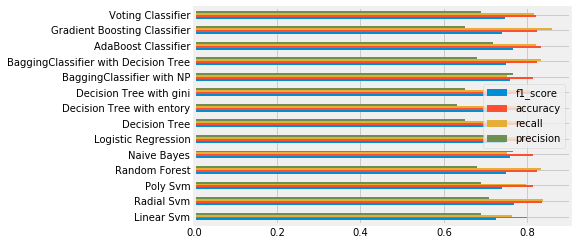

In [83]:
box=pd.DataFrame(new_models_dataframe2)
box.plot.barh()